# 이미지 바운딩 박스 편집

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from predict import *


import torch.optim as optim
import torch.nn as nn

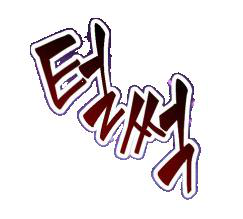

In [188]:
img = Image.open("/home/jun/myWorks/soma/font/dataset/realTesting_crop/aaa_168.jpg")
img_np = np.array(img)
img

In [189]:
gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
norm_gray = (((gray - gray.min())/(gray.max() - gray.min()))*255).astype(np.uint8)

# threshold
thresh = cv2.threshold(norm_gray, -1, 255, cv2.THRESH_TOZERO | cv2.THRESH_OTSU)[1]

# get the (largest) contour
contours = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw white filled contour on black background
img2 = np.full_like(norm_gray, 255, np.uint8)
_ = cv2.drawContours(img2, contours, -1, (0,0,0), cv2.FILLED)

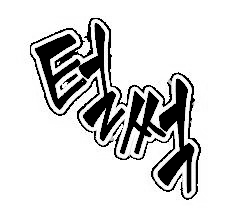

In [190]:
Image.fromarray(thresh)

In [192]:
crnn_predict([img2])

['후축출']